In [2]:
import textwrap

import pandas as pd
import geopandas as gpd

import calendar

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [65]:
# Set global seaborn theme with black background
sns.set_theme(
    context='notebook',
    style='darkgrid',
    palette='dark',
    font='DejaVu Sans',
    rc={
        'axes.facecolor': 'black',        # plot background
        'figure.facecolor': 'black',      # figure background
        'grid.color': '#1A1A1A',        # dark deep gray grid lines
        'axes.edgecolor': 'white',        # axis lines color (we'll make top/right invisible)
        'xtick.color': 'white',
        'ytick.color': 'white',
        'text.color': 'white'
    },
    color_codes=True
)

def custom_theme(ax, title, xlabel, ylabel='Frequency'):
    # Set title and labels
    ax.set_title(title, fontsize=18, fontweight='bold', color='white')
    ax.set_xlabel(xlabel, fontsize=14, fontweight='bold', color='white')
    ax.set_ylabel(ylabel, fontsize=14, fontweight='bold', color='white')
    ax.tick_params(axis='both', which='major', labelsize=12, colors='white')

    # Hide top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    # Keep left and bottom spines subtle
    ax.spines['left'].set_color('#333333')
    ax.spines['bottom'].set_color('#333333')

# Define a color for each property type
colors = {
    'building': '#3E64FF',
    'villa': '#FF6B6B',
    'unit': '#44CFCB',
    'land': '#F4A261'
}

type_order = ['unit', 'villa', 'building', 'land']  # fixed order

In [5]:
df = pd.read_csv('./data/processed/transactions_clean.csv')
areas = gpd.read_file('./data/processed/transaction_land_areas.geojson')

### Basic Data Overview

In [6]:
df['actual_worth_usd'] = df['actual_worth_usd'] / 1000000
df['instance_date'] = pd.to_datetime(df['instance_date'], errors='coerce')

In [7]:
facts = []

# Fact 1: The total number of transactions
total_transactions = df.shape[0]
facts.append(f'Total number of transactions: {total_transactions}')

# Fact 2: The number of unique areas
unique_areas = df['area_id'].nunique()
facts.append(f'Number of unique areas: {unique_areas}')

# Fact 3: The area with the most transactions
most_transactions_area = df['area_id'].value_counts().idxmax()
facts.append(f'Area with the most transactions: {most_transactions_area}')

# Fact 4: The most common transaction type
most_common_transaction_type = df['trans_group'].value_counts().idxmax()
facts.append(f'Most common transaction type: {most_common_transaction_type}')

# Fact 5: The most common transaction sub type
most_common_transaction_sub_type = df['property_sub_type'].value_counts().idxmax()
facts.append(f'Most common property sub type: {most_common_transaction_sub_type}')

# Fact 6: The most common registration type
most_common_registration_type = df['reg_type'].value_counts().idxmax()
facts.append(f'Most common registration type: {most_common_registration_type}')

# Fact 7: The most common usage
most_common_usage = df['property_usage'].value_counts().idxmax()
facts.append(f'Most common usage: {most_common_usage}')

# Fact 8: The most common property type
most_common_property_type = df['property_type'].value_counts().idxmax()
facts.append(f'Most common property type: {most_common_property_type}')

facts.append(f"Date Range: {df['instance_date'].min()} to {df['instance_date'].max()}")

for fact in facts:
    print(fact)

Total number of transactions: 1370792
Number of unique areas: 251
Area with the most transactions: 330
Most common transaction type: sales
Most common property sub type: flat
Most common registration type: existing properties
Most common usage: residential
Most common property type: unit
Date Range: 1966-01-18 00:00:00 to 2025-02-20 00:00:00


In [8]:
# General Descriptive Stats
print("\nDescriptive statistics (all transactions):")
print(df[['actual_worth_usd', 'procedure_area_sqm']].describe())

# Grouped by property_type
print("\nGrouped by property type:")
print(df.groupby('property_type')[['actual_worth_usd', 'procedure_area_sqm']].mean())


Descriptive statistics (all transactions):
       actual_worth_usd  procedure_area_sqm
count      1.370792e+06        1.370792e+06
mean       6.467439e-01        6.483615e+02
std        1.467935e+00        8.385804e+04
min        2.700000e-07        1.000000e-02
25%        1.942103e-01        6.998000e+01
50%        3.510000e-01        1.134100e+02
75%        6.345000e-01        2.211400e+02
max        2.997844e+01        6.414803e+07

Grouped by property type:
               actual_worth_usd  procedure_area_sqm
property_type                                      
building               4.741418         4955.850149
land                   1.690903         4193.499062
unit                   0.365866           98.892027
villa                  0.701706          538.216498


### Property Type Distribution

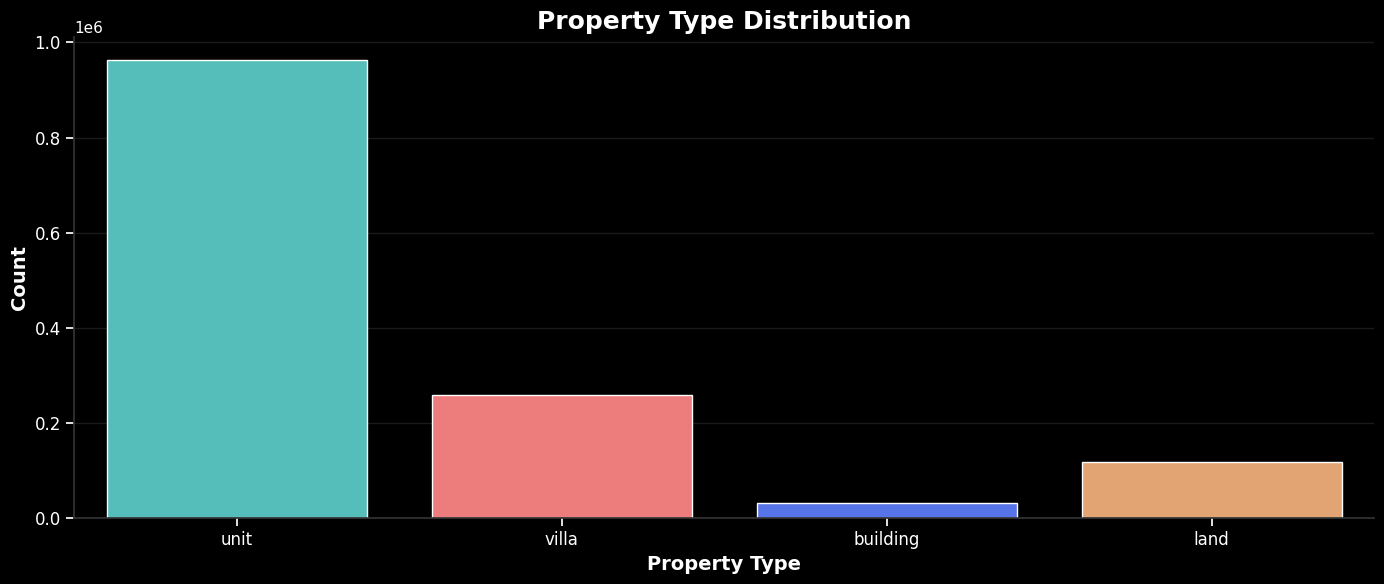

In [11]:
plt.figure(figsize=(14, 6))

ax = sns.countplot(
    x='property_type',
    data=df,
    order=type_order,
    palette=[colors[t] for t in type_order]
)

custom_theme(ax, 'Property Type Distribution', 'Property Type', 'Count')

plt.tight_layout()
plt.show()

### Usage Type Distribution

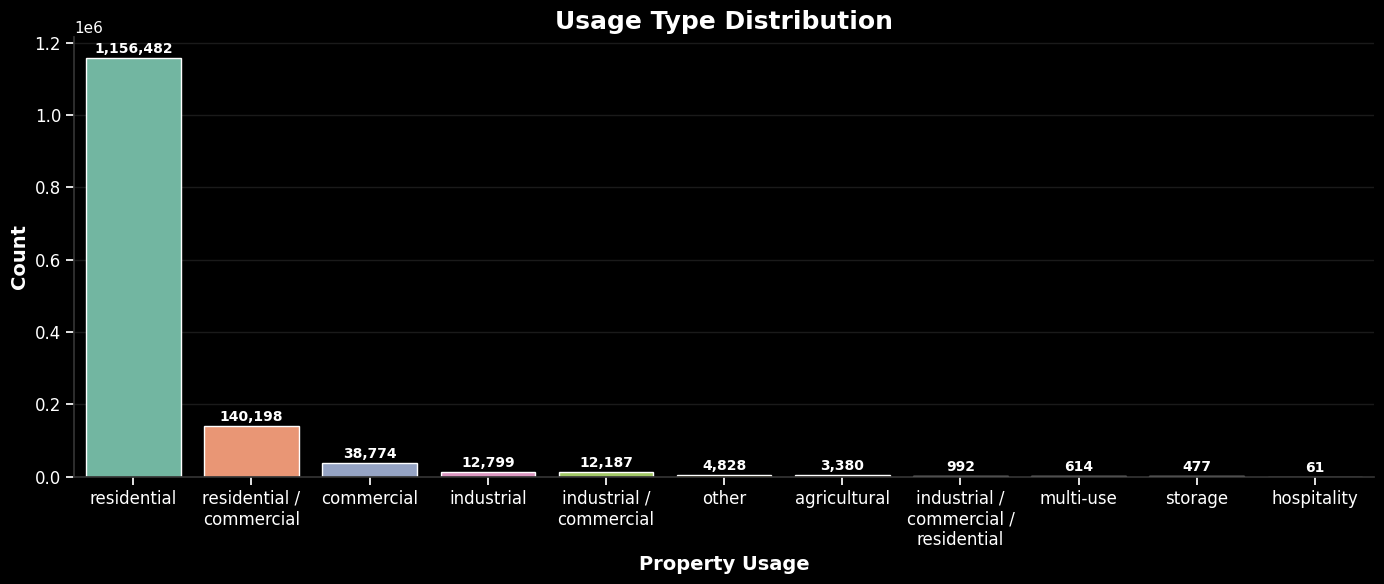

In [25]:
plt.figure(figsize=(14, 6))
palette = sns.color_palette("Set2")

wrapped_labels = [
    textwrap.fill(label, 14) 
    for label in df['property_usage'].astype(str).unique()
]

ax = sns.countplot(
    x='property_usage',
    data=df,
    palette=palette,
    order=df['property_usage'].value_counts().index
)

# Apply your custom theme
custom_theme(
    ax=ax,
    title='Usage Type Distribution',
    xlabel='Property Usage',
    ylabel='Count'
)

# Add integer counts on bars
for p in ax.patches:
    height = int(p.get_height())  # convert to int
    ax.text(
        p.get_x() + p.get_width() / 2,   
        height + df['property_usage'].value_counts().max() * 0.005,
        f'{height:,}',                   # formatted integer with comma separator
        ha='center',
        va='bottom',
        fontsize=10,
        color='white',
        fontweight='bold'
    )

plt.xticks(
    ticks=range(len(wrapped_labels)),
    labels=wrapped_labels,
    rotation=0,
    ha='center'
)

plt.tight_layout()
plt.show()

### Transaction Type Distribution

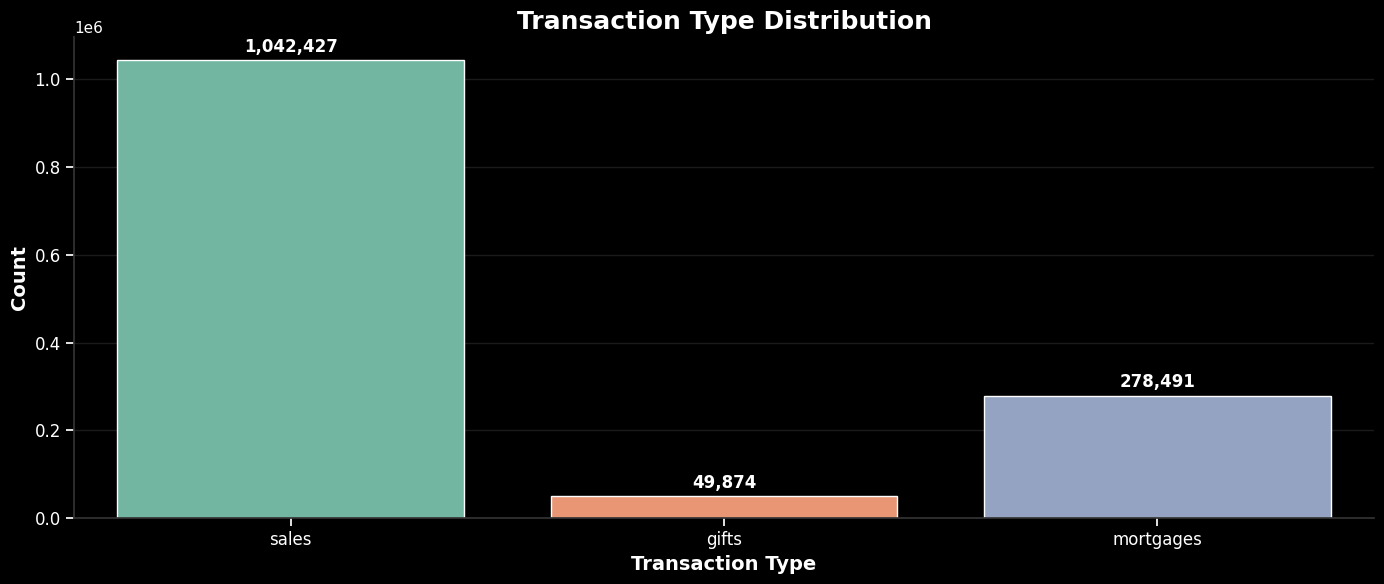

In [ ]:
plt.figure(figsize=(14, 6))

palette = sns.color_palette("Set2")
ax = sns.countplot(x='trans_group', data=df, palette=palette)

custom_theme(
    ax=ax,
    title='Transaction Type Distribution',
    xlabel='Transaction Type',
    ylabel='Count'
)

# Annotate counts on top of bars (as integers)
for p in ax.patches:
    height = int(p.get_height())
    ax.text(
        x=p.get_x() + p.get_width() / 2,                            # center of the bar
        y=height + (df['trans_group'].value_counts().max() * 0.01), # slightly above bar
        s=f'{height:,}',                                            # formatted integer
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='semibold',
        color='white'
    )

plt.tight_layout()
plt.show()

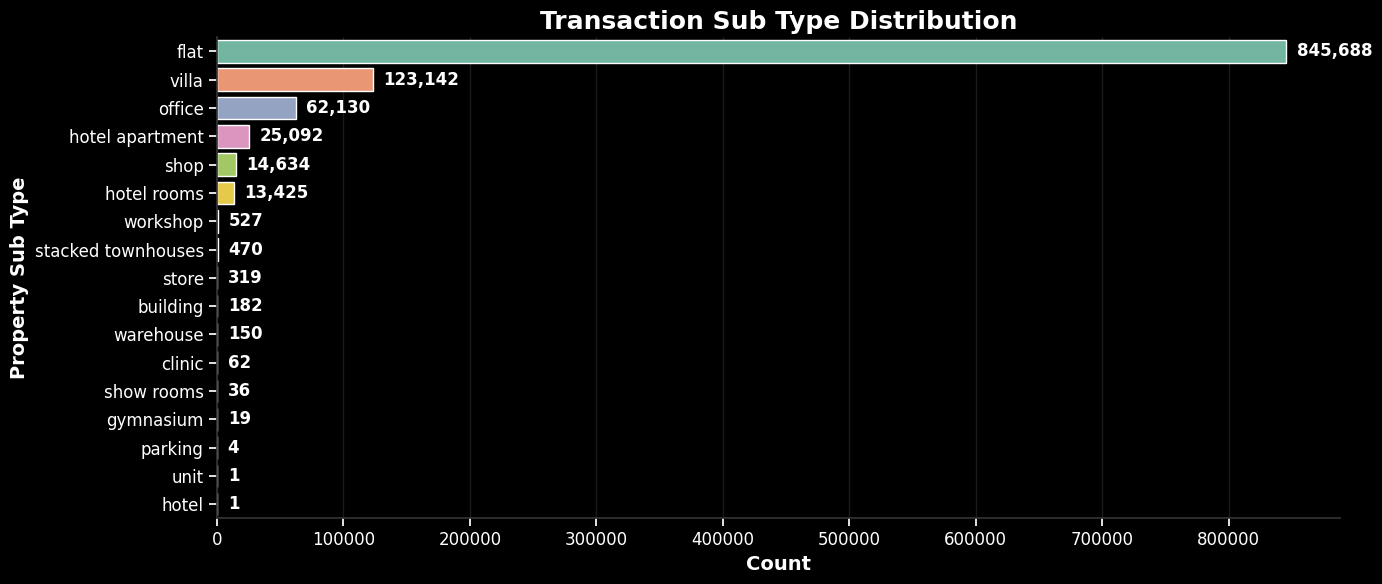

In [ ]:
plt.figure(figsize=(14, 6))

palette = sns.color_palette("Set2")

ax = sns.countplot(
    y='property_sub_type',
    data=df,
    palette=palette,
    order=df['property_sub_type'].value_counts().index
)

custom_theme(
    ax=ax,
    title='Transaction Sub Type Distribution',
    xlabel='Count',
    ylabel='Property Sub Type'
)

# Annotate counts on bars
value_counts = df['property_sub_type'].value_counts()
for i, (subtype, count) in enumerate(value_counts.items()):
    ax.text(
        count + (value_counts.max() * 0.01),
        i,
        f'{int(count):,}',
        va='center',
        ha='left',
        fontsize=12,
        fontweight='semibold',
        color='white'
    )

plt.tight_layout()
plt.show()

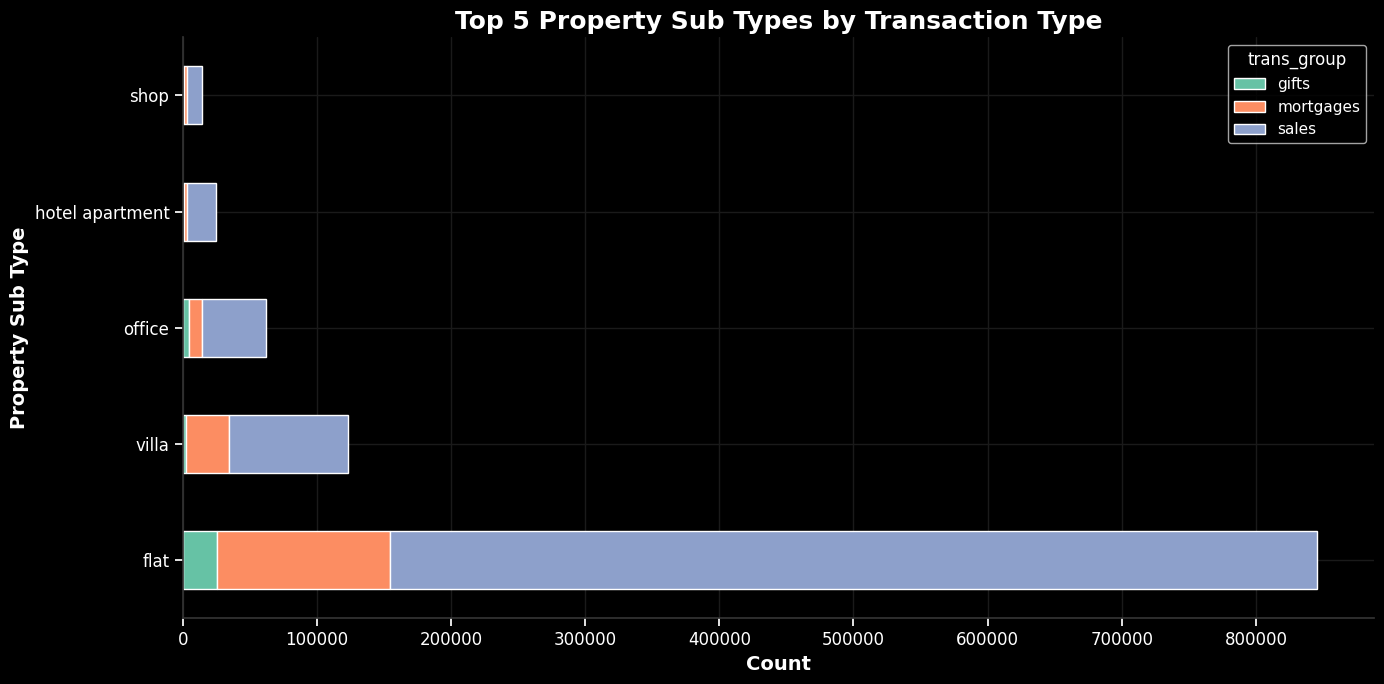

In [44]:
top5_subtypes = df['property_sub_type'].value_counts().head(5).index
top5_df = df[df['property_sub_type'].isin(top5_subtypes)]

stacked_data = top5_df.groupby(['property_sub_type', 'trans_group']).size().unstack(fill_value=0)
stacked_data = stacked_data.loc[stacked_data.sum(axis=1).sort_values(ascending=False).index]

ax = stacked_data.plot(
    kind='barh',
    stacked=True,
    figsize=(14, 7),
    color=sns.color_palette("Set2", n_colors=stacked_data.shape[1])
)

custom_theme(
    ax=ax,
    title='Top 5 Property Sub Types by Transaction Type',
    xlabel='Count',
    ylabel='Property Sub Type'
)

plt.tight_layout()
plt.show()

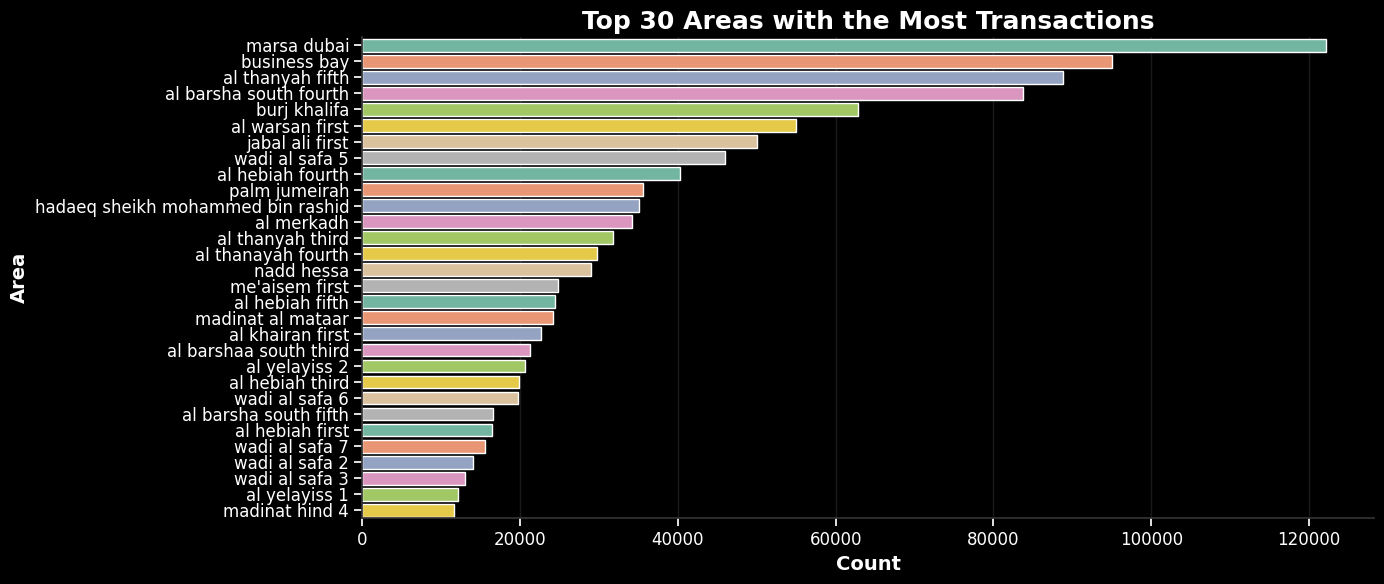

In [46]:
plt.figure(figsize=(14, 6))

top_areas = df['area_name'].value_counts().iloc[:30].index
top_area_df = df[df['area_name'].isin(top_areas)]

ax = sns.countplot(
    y='area_name',
    data=top_area_df,
    order=top_areas,
    palette=sns.color_palette("Set2", n_colors=30)
)

custom_theme(
    ax=ax,
    title='Top 30 Areas with the Most Transactions',
    xlabel='Count',
    ylabel='Area'
)

plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

### Transactions by Number of Rooms

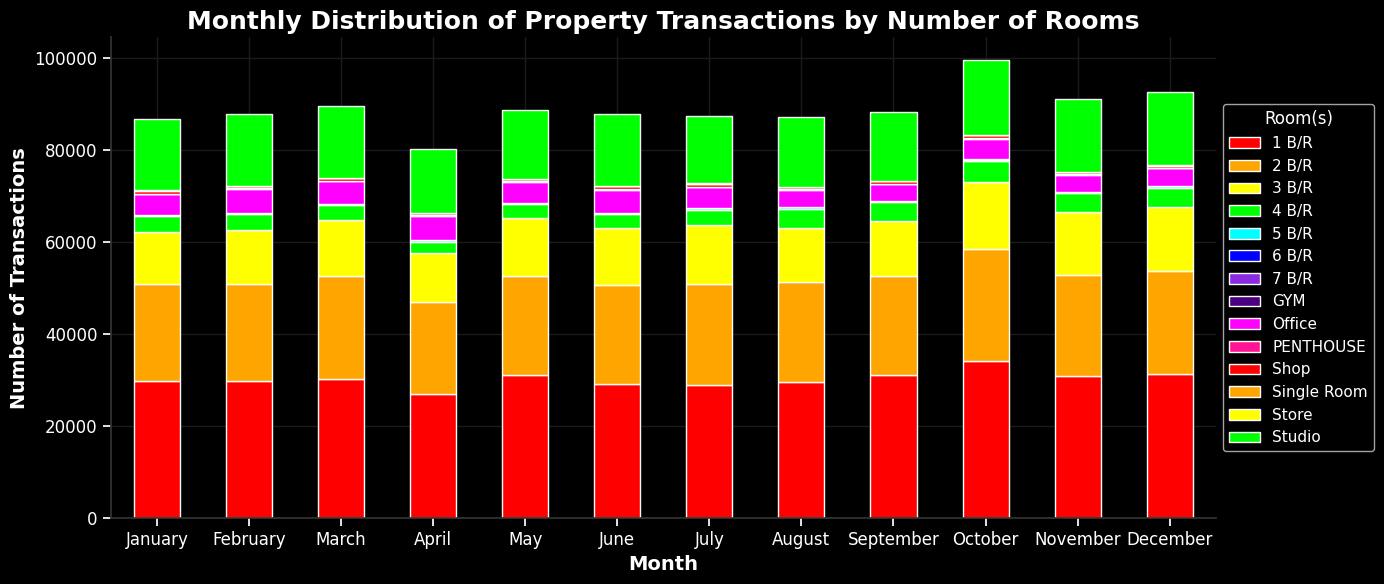

In [48]:
df['month'] = pd.to_datetime(df['instance_date']).dt.month

room_month_counts = df.groupby(['rooms', 'month']).size().reset_index(name='counts')
pivot_df = room_month_counts.pivot(index='month', columns='rooms', values='counts').fillna(0)

colors = ['#FF0000', '#FFA500', '#FFFF00', '#00FF00', '#00FFFF', 
          '#0000FF', '#8A2BE2', '#4B0082', '#FF00FF', '#FF1493']

fig, ax = plt.subplots(figsize=(14, 6))
pivot_df.plot(kind='bar', stacked=True, color=colors, ax=ax)

custom_theme(
    ax=ax,
    title='Monthly Distribution of Property Transactions by Number of Rooms',
    xlabel='Month',
    ylabel='Number of Transactions'
)

ax.set_xticklabels([calendar.month_name[int(m)] for m in pivot_df.index], rotation=0, ha='center')
ax.legend(title='Room(s)', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

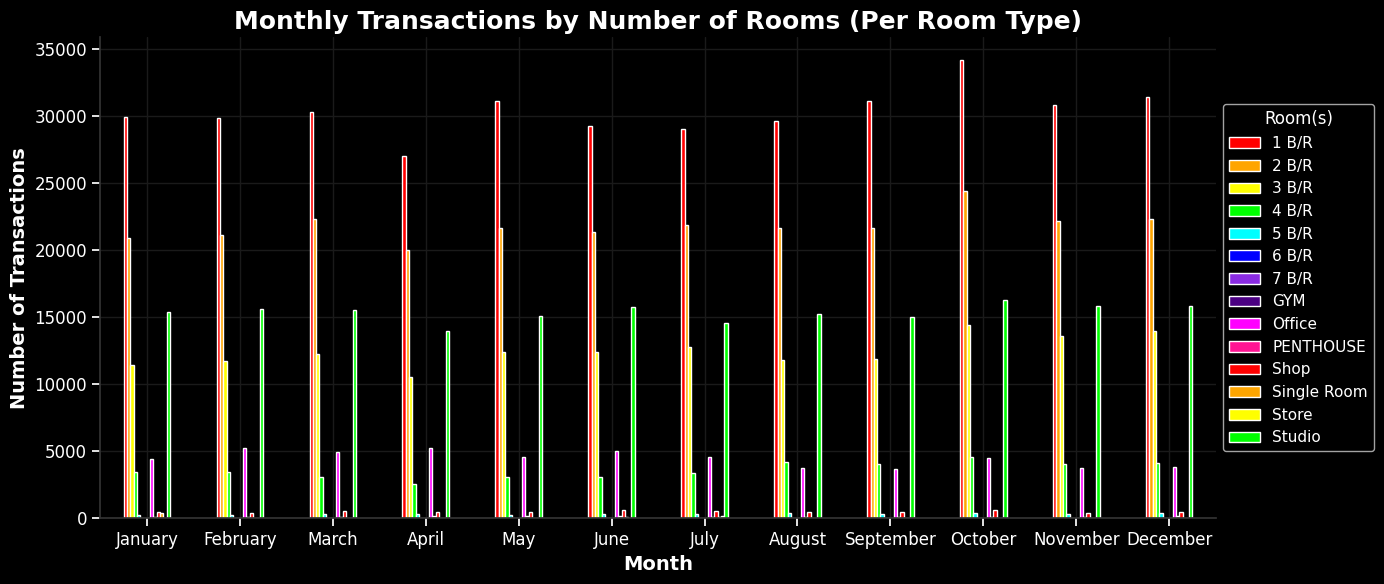

In [52]:
# Plot non-stacked bar chart
fig, ax = plt.subplots(figsize=(14, 6))
pivot_df.plot(kind='bar', stacked=False, color=colors, ax=ax)

# Apply custom theme
custom_theme(
    ax=ax,
    title='Monthly Transactions by Number of Rooms (Per Room Type)',
    xlabel='Month',
    ylabel='Number of Transactions'
)

# Set x-axis ticks to month names
ax.set_xticklabels([calendar.month_name[int(m)] for m in pivot_df.index], rotation=0, ha='center')

# Place legend outside for readability
ax.legend(title='Room(s)', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

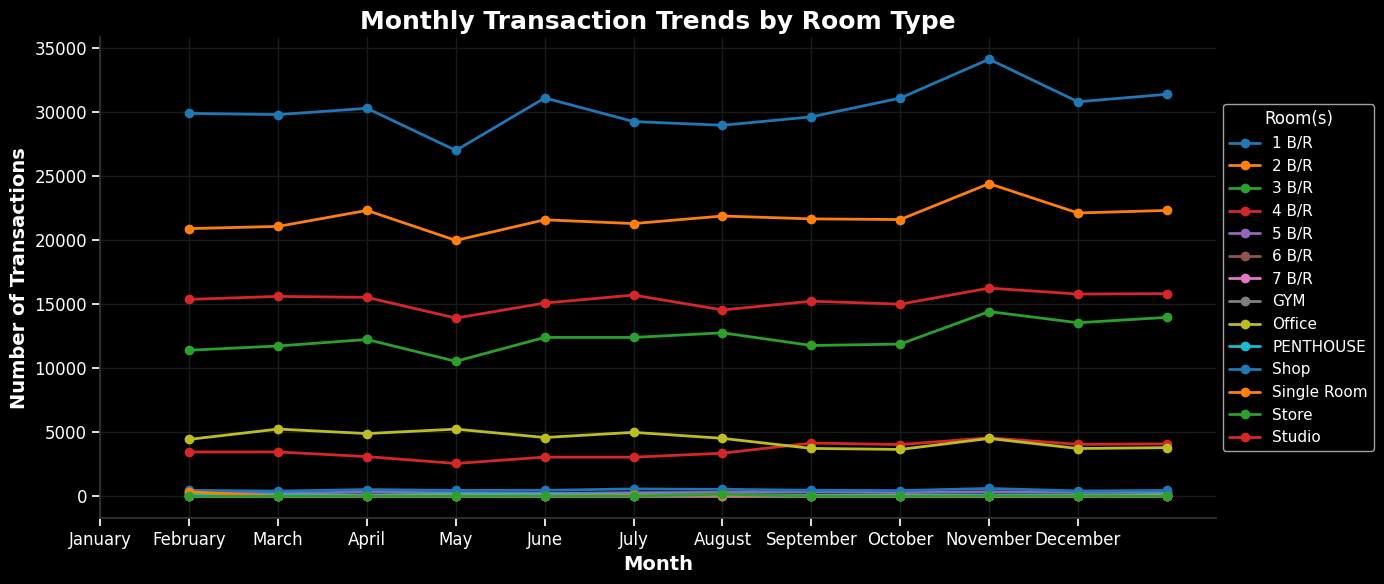

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))

palette = sns.color_palette("tab10", n_colors=pivot_df.shape[1])
for i, col in enumerate(pivot_df.columns):
    ax.plot(
        pivot_df.index,
        pivot_df[col],
        marker='o',
        label=col,
        color=palette[i],
        linewidth=2
    )

custom_theme(
    ax=ax,
    title='Monthly Transaction Trends by Room Type',
    xlabel='Month',
    ylabel='Number of Transactions'
)

ax.set_xticks(range(len(pivot_df.index)))
ax.set_xticklabels([calendar.month_name[int(m)] for m in pivot_df.index], rotation=0, ha='center')

ax.legend(title='Room(s)', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

### Distribution of Property Prices

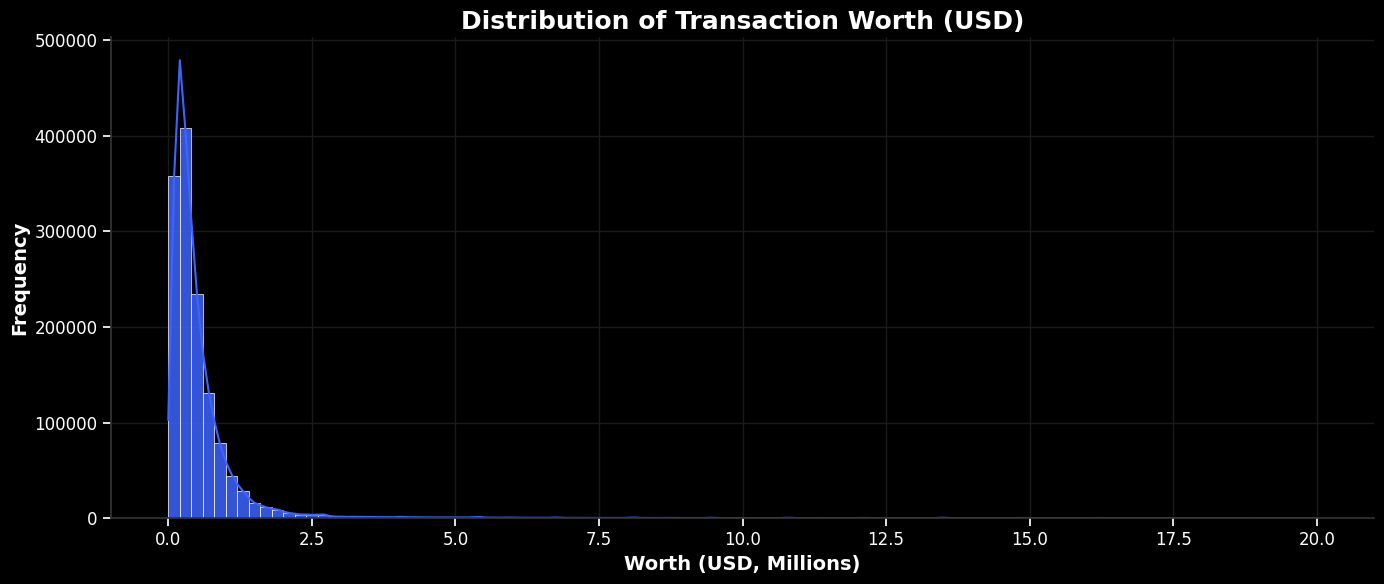

In [63]:
plt.figure(figsize=(14, 6))
ax = sns.histplot(df[df['actual_worth_usd'] <= 20]['actual_worth_usd'], bins=100, kde=True, color='#3E64FF', edgecolor='white', linewidth=0.5, alpha=0.85)

# Custom theme
custom_theme(ax, 'Distribution of Transaction Worth (USD)', 'Worth (USD, Millions)')
plt.tight_layout()
plt.show()

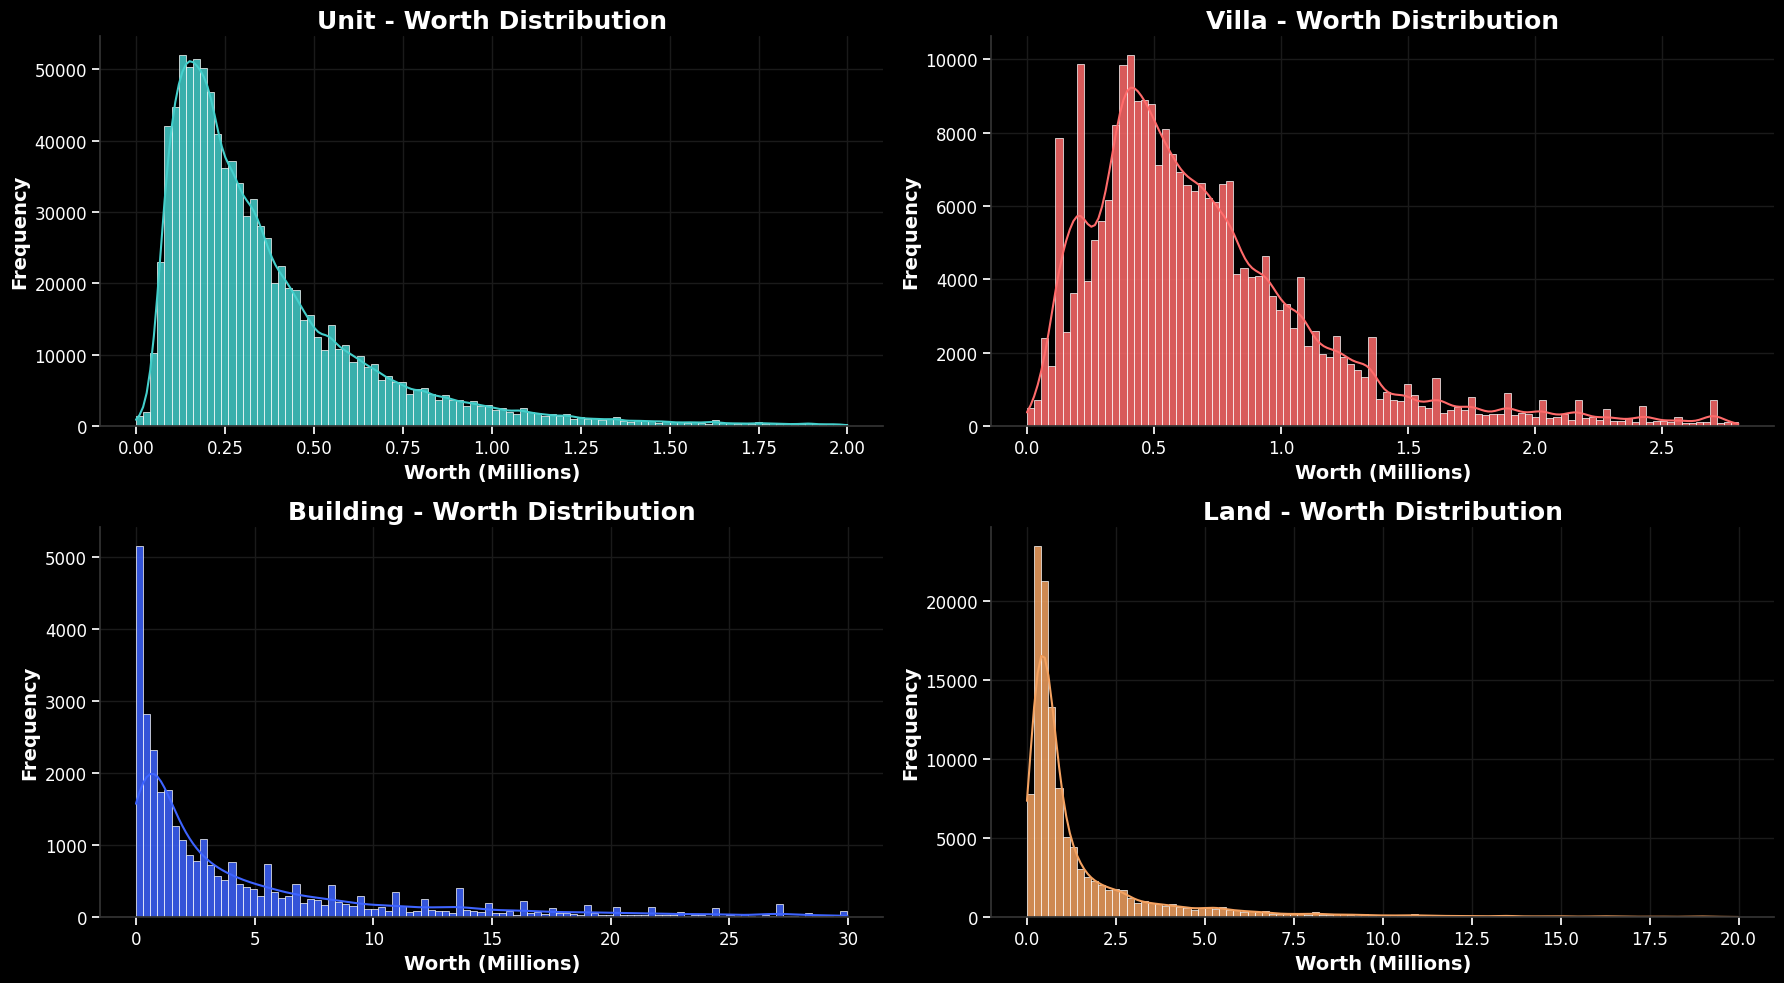

In [66]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
axes = axes.flatten()

for i, prop_type in enumerate(type_order):
    ax = axes[i]
    subset = df[df['property_type'] == prop_type]
    sns.histplot(
        subset['actual_worth_usd'],
        bins=100,
        kde=True,
        color=colors[prop_type],
        edgecolor='white',
        linewidth=0.5,
        alpha=0.85,
        ax=ax
    )
    custom_theme(ax, f'{prop_type.capitalize()} - Worth Distribution', 'Worth (Millions)')

plt.tight_layout()
plt.show()

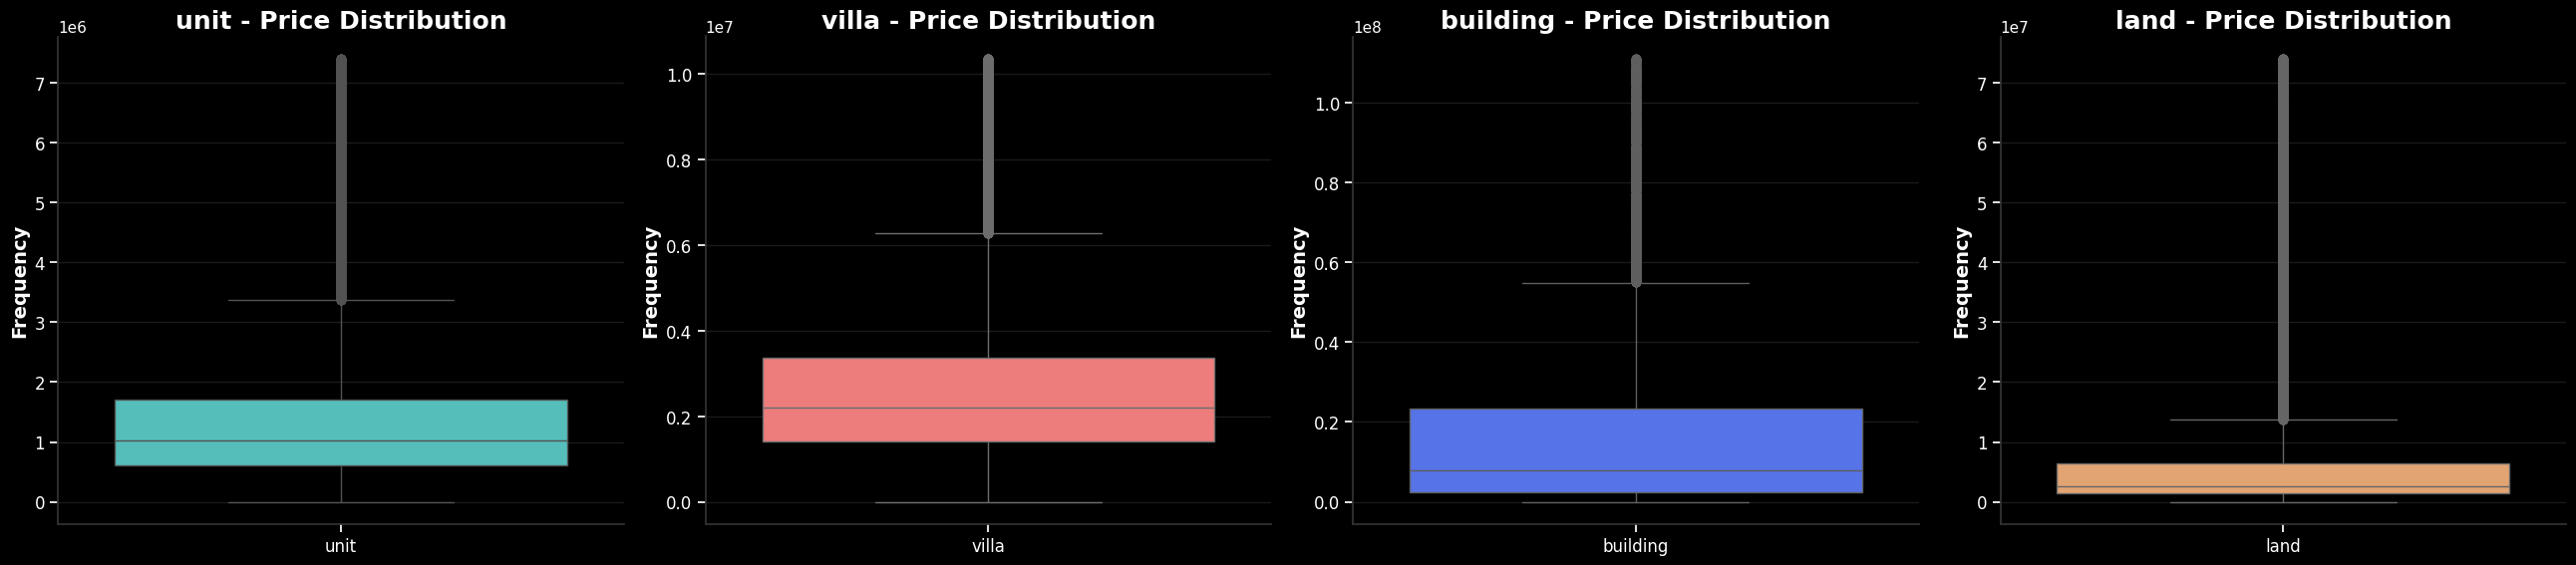

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(26, 6))
axes = axes.flatten()

for i, ptype in enumerate(type_order):
    ax = axes[i]
    subset = df[df['property_type'] == ptype]
    sns.boxplot(
        data=subset,
        x='property_type',
        y='actual_worth_aed',
        palette={ptype: colors[ptype]},
        ax=ax
    )
    custom_theme(ax, f'{ptype} - Price Distribution', 'Actual Worth (Millions)')
    ax.set_xlabel('')
    ax.set_xticklabels([ptype], rotation=0)

plt.tight_layout()
plt.show()

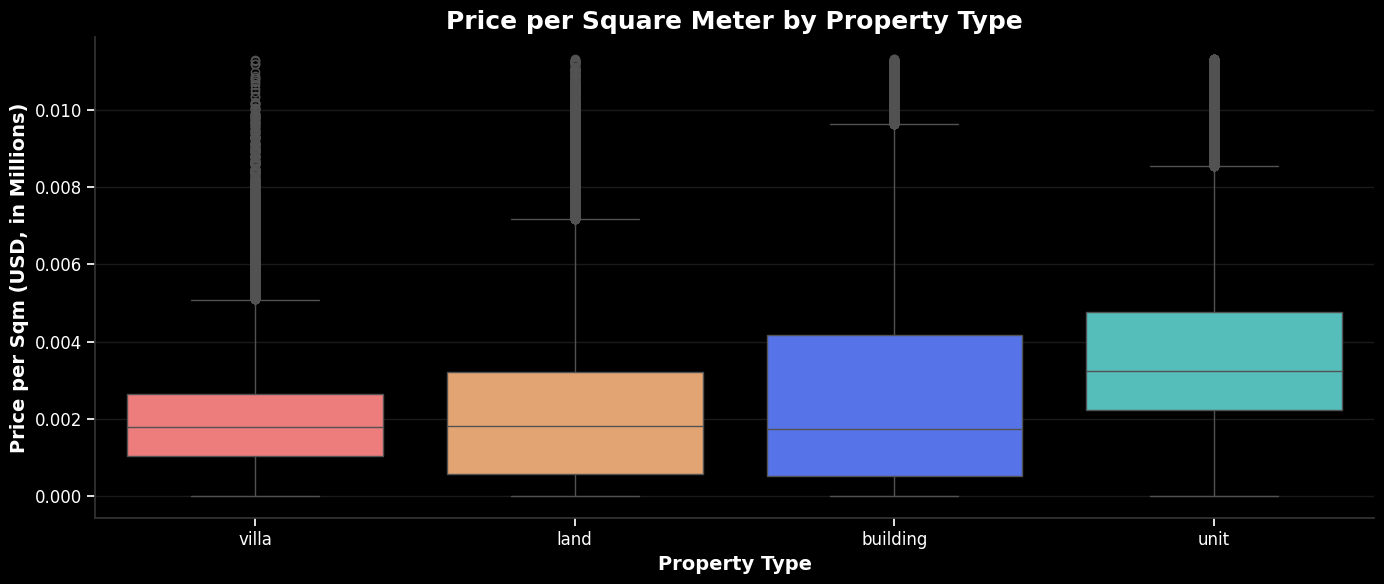

In [80]:
# Compute price per sqm
df['price_per_sqm_usd'] = df['actual_worth_usd'] / df['procedure_area_sqm']

plt.figure(figsize=(14, 6))
ax = sns.boxplot(
    x='property_type', 
    y='price_per_sqm_usd', 
    data=df[df['price_per_sqm_usd'] < df['price_per_sqm_usd'].quantile(0.99)],
    palette=colors
)

custom_theme(
    ax=ax,
    title='Price per Square Meter by Property Type',
    xlabel='Property Type',
    ylabel='Price per Sqm (USD, in Millions)'
)

plt.tight_layout()
plt.show()

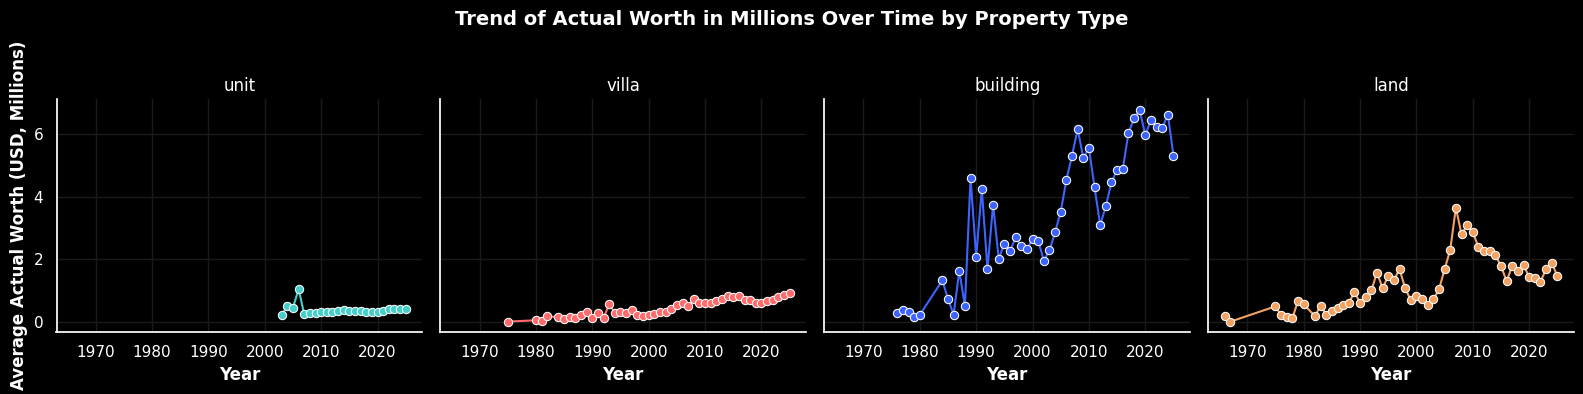

In [ ]:
df['year'] = df['instance_date'].dt.year
df['month'] = df['instance_date'].dt.month

trend_data = df.groupby(['year', 'property_type'])['actual_worth_usd'].mean().reset_index()

g = sns.FacetGrid(trend_data, col="property_type", col_wrap=4, height=4, sharex=True, sharey=True,
                  col_order=type_order)

g.map_dataframe(sns.lineplot, x="year", y="actual_worth_usd", marker="o", hue="property_type",
                palette=colors)

g.set_titles(col_template="{col_name}")
g.fig.suptitle("Trend of Actual Worth in Millions Over Time by Property Type", fontsize=14, fontweight='bold', color='white')

for ax in g.axes.flatten():
    ax.set_xlabel("Year", fontsize=12, fontweight='bold', color='white')
    ax.set_ylabel("Average Actual Worth (USD, Millions)", fontsize=12, fontweight='bold', color='white')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Distribution of Property Sizes

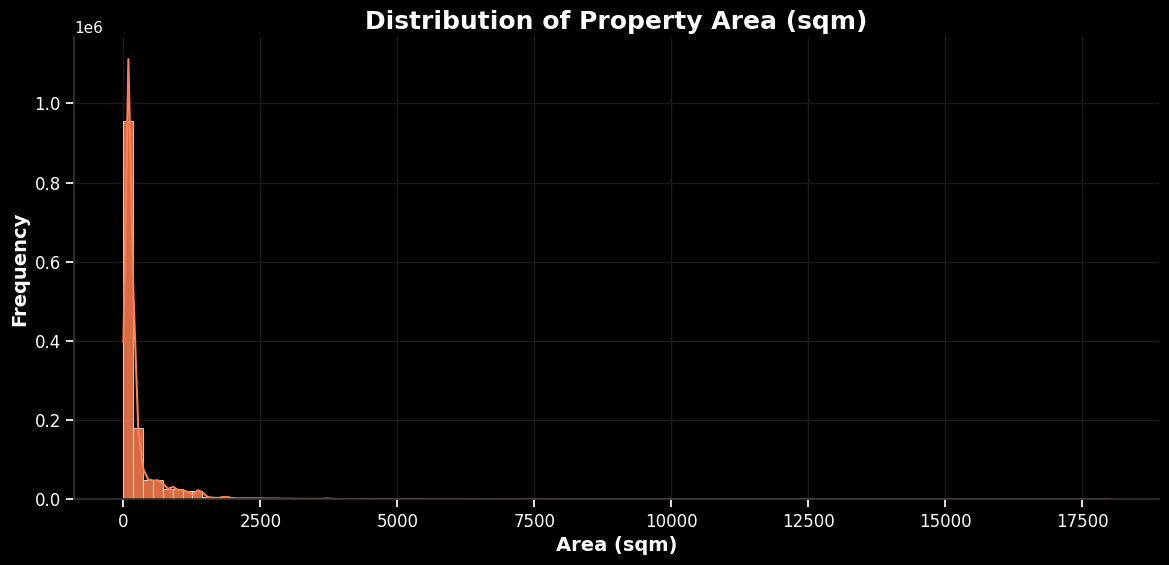

In [68]:
plt.figure(figsize=(14, 6))
ax = sns.histplot(df[df['procedure_area_sqm'] <= 18000]['procedure_area_sqm'], bins=100, kde=True, color='#FF7F50', edgecolor='white', linewidth=0.5, alpha=0.85)

custom_theme(ax, 'Distribution of Property Area (sqm)', 'Area (sqm)')
plt.show()

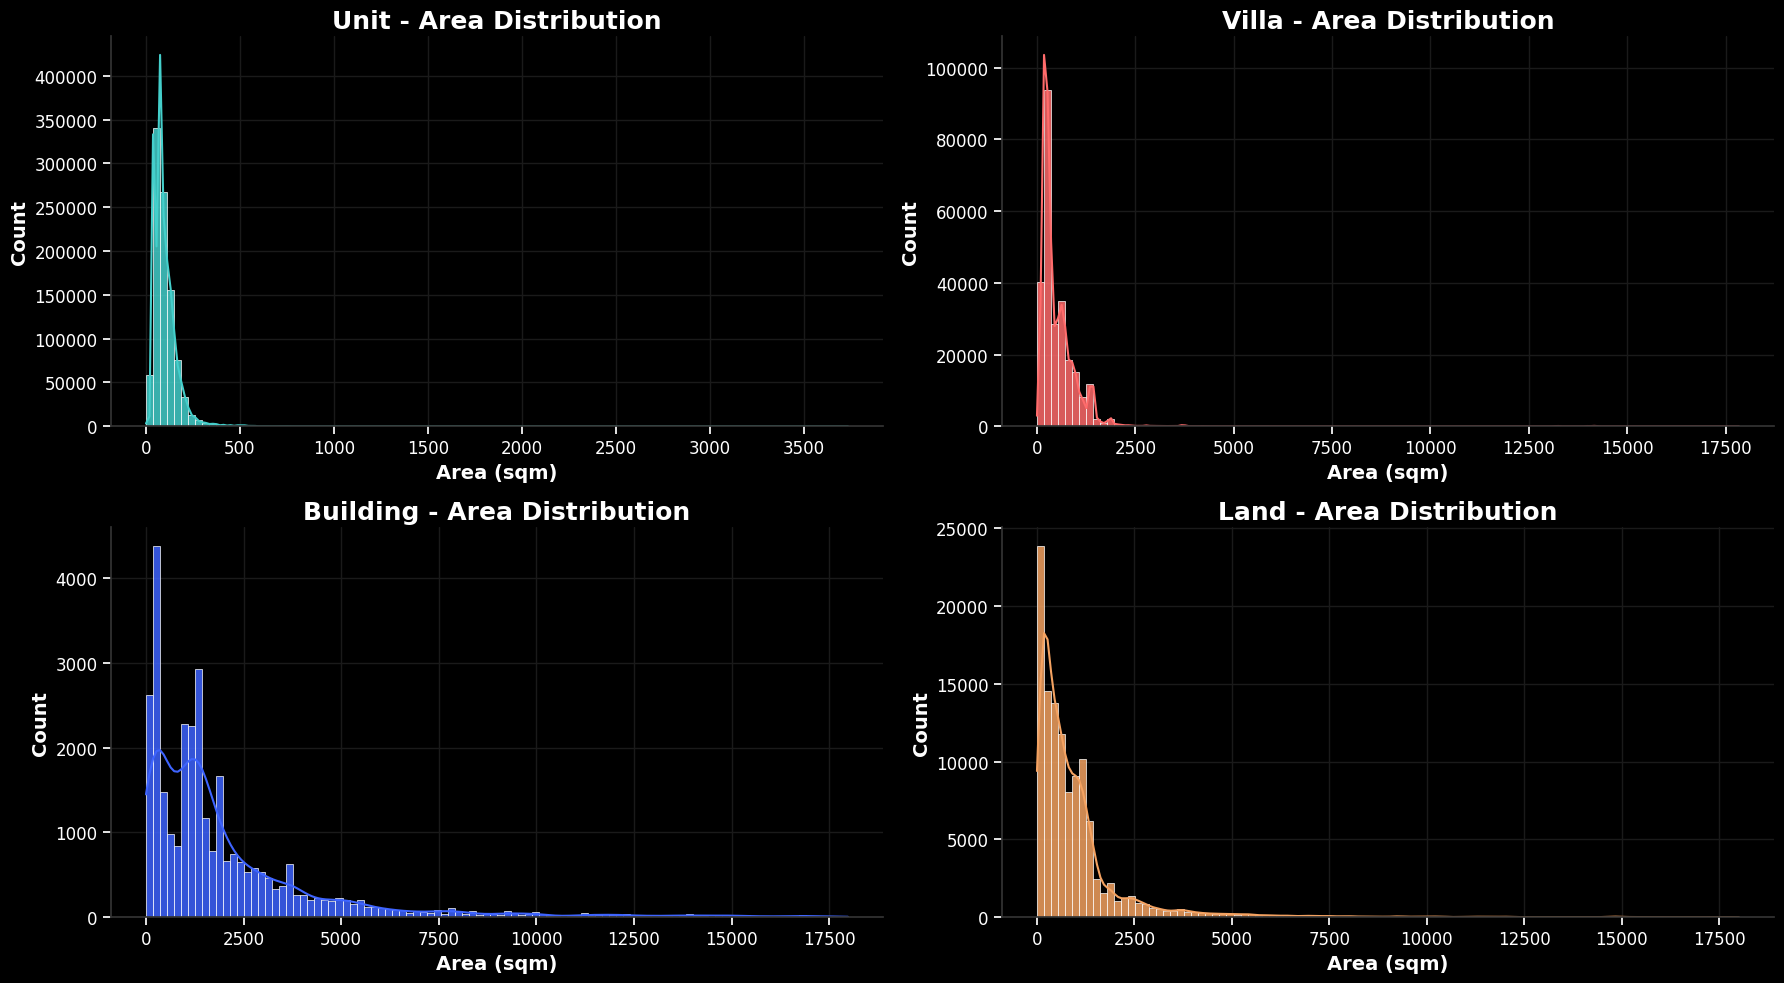

In [69]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
axes = axes.flatten()

for i, ptype in enumerate(type_order):
    ax = axes[i]
    subset = df[(df['property_type'] == ptype) & (df['procedure_area_sqm'] <= 18000)]
    sns.histplot(
        subset['procedure_area_sqm'],
        bins=100,
        kde=True,
        color=colors[ptype],
        edgecolor='white',
        linewidth=0.5,
        alpha=0.85,
        ax=ax
    )
    
    custom_theme(ax, f'{ptype.capitalize()} - Area Distribution', 'Area (sqm)')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()